# Adult Income Class Prediction (Binary Classification - Predict income  class >50K or <=50K)

## Import Dataset and See First 5 Data Rows

In [2]:
import pandas as pd
from matplotlib.pylab import rcParams

# Load the dataset
data = r'Data/adult.data'

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']

df = pd.read_csv(data, header=None, names=column_names)

# Show the first 5 rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Statistical Analysis

##  Check variables information

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


## Check variables statistical properties

In [4]:
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


# Exploratory Data Analsysis (EDA)

## Income class vs Education

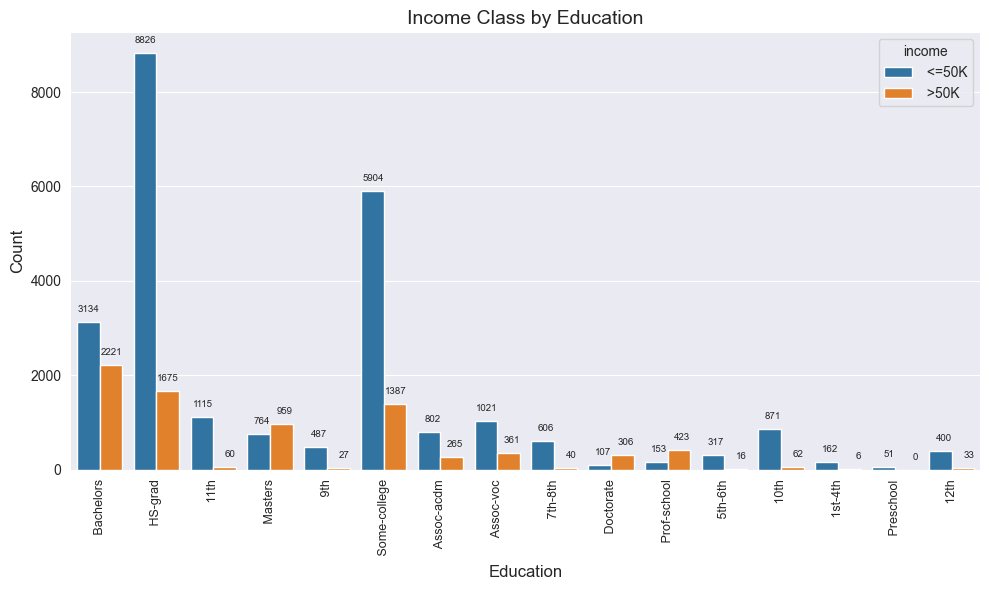

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

rcParams['figure.figsize'] = 10, 6
plt.rcParams["figure.autolayout"] = True

sns.set_style("darkgrid")

b = sns.countplot(data=df, x='education', hue='income')

# Add a border to the plot
sns.despine(bottom=True, left=True)
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)

graphe_title = 'Income Class by Education'
b.axes.set_title(graphe_title,fontsize=14) 
plt.xlabel('Education', fontsize=12 )
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=9,rotation=90)
for p in b.patches:
    b.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 1, p.get_height()), 
                   ha = 'right', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points',
                   fontsize=7)
plt.show()

# Data Pre processing

## Null Value Analsis and Treatment

In [6]:
# Find out Number of null values
df.isnull().sum().sum()

0

## Remove Duplicates 

In [7]:
no_of_duplicates = len(df[df.duplicated()])

print(f"Number of duplicates : {no_of_duplicates}\n")

if no_of_duplicates: 
    print("Before dropping duplicates rows: ", len(df))
    df= df.drop_duplicates()
    print('After dropping duplicates: ', len(df)) 

Number of duplicates : 24

Before dropping duplicates rows:  32561
After dropping duplicates:  32537


## Convert Target Variable to 1 (Income > 50K) and 0 (Income <=50K)

In [8]:
df['income_class'] = df['income'].apply(lambda x: 1 if x == ' >50K' else 0)
df.drop(labels=['income'], axis=1, inplace=True)

## Split Dataset to Train and Test

In [9]:
from sklearn.model_selection import train_test_split

predictors = df.drop(labels=['income_class'], axis=1)
target = df['income_class']

train_predictors, test_predictors, train_target, test_target = train_test_split(predictors,target, test_size=0.2, random_state=1)

print('Train predictor size: ', train_predictors.shape)
print('Train target size:', test_target.shape)

print('Test predictor size:', test_predictors.shape)
print('Test target size:', test_target.shape)

Train predictor size:  (26029, 14)
Train target size: (6508,)
Test predictor size: (6508, 14)
Test target size: (6508,)


## Categorical Variable Treatment

### Check number of categories and values in each variable

In [10]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for cat_feature in cat_features:
    print('========================================================')
    print('{} - {}'.format(cat_feature,len(df[cat_feature].unique())))
    print('Categories: ') 
    print(df[cat_feature].unique()) 
    
# Ordinal variables.
ordinal_features =['education']

# Nominal variables.
nominla_features =['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

workclass - 9
Categories: 
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education - 16
Categories: 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status - 7
Categories: 
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation - 15
Categories: 
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship - 6
Categories: 
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race - 5
Categories: 
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-

## Nominal Variables
(Note- there is only one ordinal feature- education we are treating it as nominal for simplicity)

In [11]:
from sklearn.preprocessing import OneHotEncoder

# Nominal Features 
# nominal_features = [x for x in car_features if x not in ordinal_features]

nominal_features = cat_features

#Apply one hot encoding 
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
ohe_train_predictors = one_hot_encoder.fit_transform(train_predictors[nominal_features])
ohe_test_predictors = one_hot_encoder.transform(test_predictors[nominal_features])

#Convert it to df
df_ohe_train_predictors = pd.DataFrame(ohe_train_predictors, index=train_predictors.index)
df_ohe_test_predictors = pd.DataFrame(ohe_test_predictors, index=test_predictors.index)

#Extract only the columns that didnt need to be encoded
data_other_cols_train_predictors = train_predictors.drop(columns=nominal_features)
data_other_cols_test_predictors = test_predictors.drop(columns=nominal_features)

#Concatenate the two dataframes : 
encoded_train_predictors = pd.concat([df_ohe_train_predictors, data_other_cols_train_predictors], axis=1)
encoded_test_predictors = pd.concat([df_ohe_test_predictors, data_other_cols_test_predictors], axis=1)

# #import pandas as pd
# encoded_train_predictors = pd.get_dummies(train_predictors, columns = nominal_features)
# encoded_test_predictors = pd.get_dummies(test_predictors, columns=nominal_features)

print(encoded_train_predictors.shape)
print(encoded_test_predictors.shape)

# encoded_train_predictors.columns.tolist()

(26029, 108)
(6508, 108)


# Train ML Model

##  XGboost

In [12]:
from xgboost import XGBClassifier

# Define the parameters as a dictionary
parameters = {
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1,
    'reg_lambda': 0.1
}
xgb = XGBClassifier(**parameters)

xgb.fit(encoded_train_predictors, train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

## Learning Curve

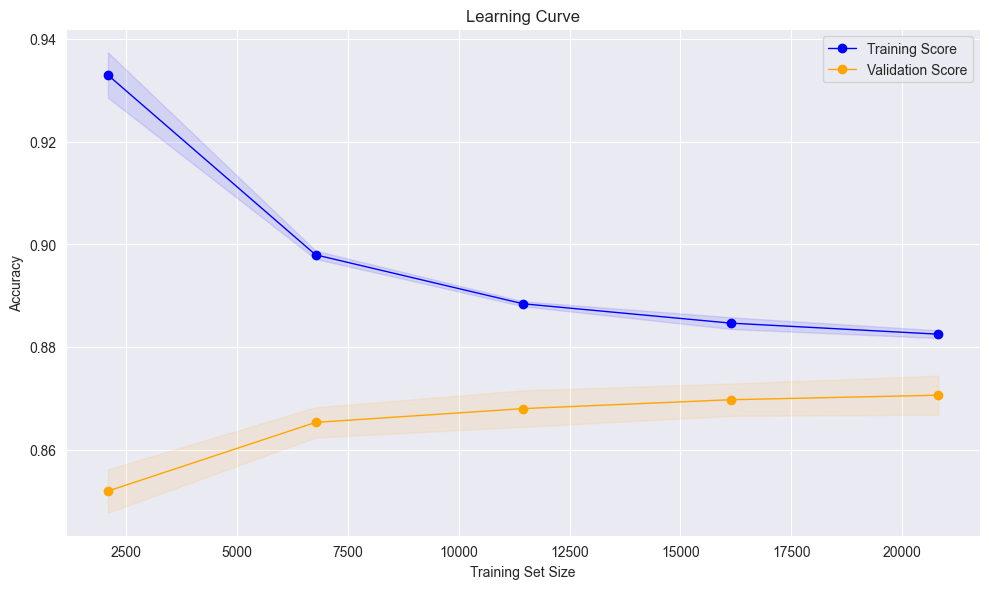

In [13]:
from sklearn.model_selection import learning_curve
from numpy import sqrt
import numpy as np

# Calculate the learning curve using neg_mean_squared_error scoring
train_sizes, train_scores, val_scores = learning_curve(xgb, encoded_train_predictors, train_target, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue', marker='o', linewidth=1)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, val_scores_mean, label='Validation Score', color='orange', marker='o', linewidth=1)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color='orange')
plt.xlabel('Training Set Size', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Learning Curve', fontsize=12)
plt.legend(loc='best')
plt.grid(True)
plt.savefig('Learning Curve.jpg') 
plt.show()


# Model Evaluation

## Classification and Confusion Matrix

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
from math import sqrt

test_predictions = xgb.predict(encoded_test_predictors)

print('Classification:\n',classification_report(test_target, test_predictions))
print('Confusion Matrix:\n', confusion_matrix(test_target, test_predictions))

Classification:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      5014
           1       0.76      0.66      0.70      1494

    accuracy                           0.87      6508
   macro avg       0.83      0.80      0.81      6508
weighted avg       0.87      0.87      0.87      6508

Confusion Matrix:
 [[4704  310]
 [ 514  980]]


## Visualize Classification Report

<Axes: title={'center': 'XGBClassifier Classification Report'}>

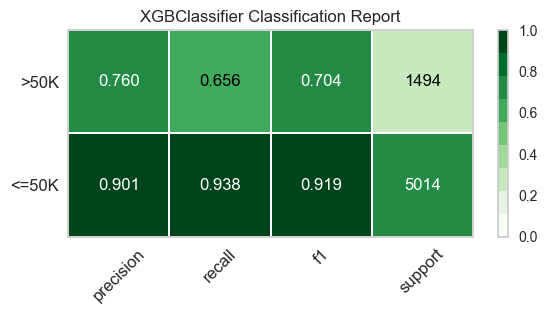

In [15]:
# Change target from number to actual labels
from yellowbrick.classifier import ClassificationReport

class_names = xgb.classes_
str_class_names = class_names.astype(str)
str_class_names[0] = '<=50K'
str_class_names[1] = '>50K'
str_class_names

# Generate the classification report
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 6, 3.3

visualizer = ClassificationReport(xgb, support=True, cmap='Greens', classes=str_class_names)
visualizer.fit(encoded_train_predictors, train_target)
visualizer.score(encoded_test_predictors, test_target)
# plt.title('Classification')
visualizer.show(outpath="classification_report.jpg")

## Visualize Confusion Matrix

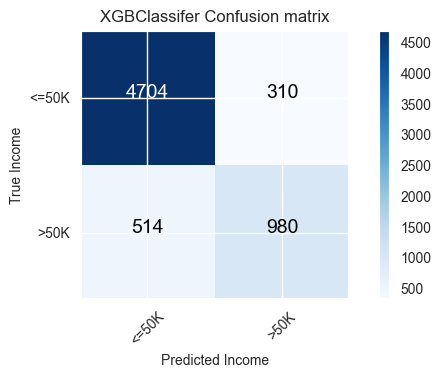

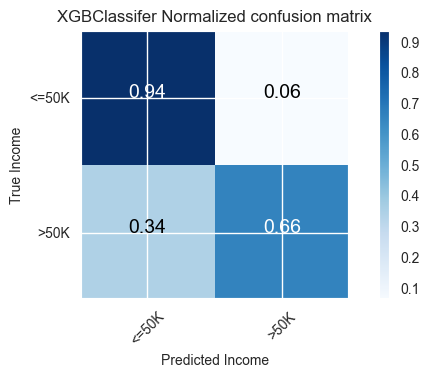

In [22]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 6,4

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        # print('Confusion matrix, without normalization')
        pass

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=12)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
         plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
                
    plt.tight_layout()
    plt.ylabel('True Income', fontsize=10)
    plt.xlabel('Predicted Income', fontsize=10)

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_target, test_predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=str_class_names,
                      title='XGBClassifer Confusion matrix')

plt.savefig('Confusion Matrix.jpg')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=str_class_names, normalize=True,
                      title='XGBClassifer Normalized confusion matrix')

plt.savefig('Confusion Matrix Normalized.jpg')
# plt.show()

## ROC - AUC Curve

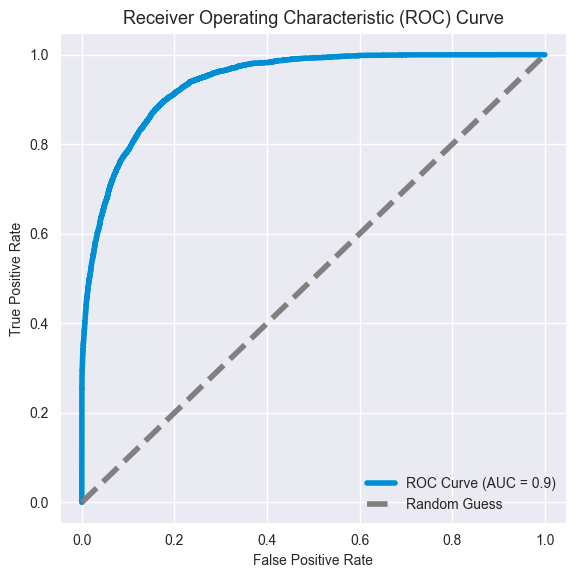

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve
# Predict the probabilities of the positive class for the training data
train_predictions = xgb.predict_proba(encoded_train_predictors)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(train_target, train_predictions)

# Calculate the AUC score
auc_score = roc_auc_score(train_target, train_predictions)

plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')
rcParams['figure.figsize'] = 6,6 

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.1f})'.format(auc_score))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=13)
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('AUC_ROC Curve.jpg')
plt.show()

## Visualize Actual and Predictions 

In [18]:
output_df =  test_predictors.copy()

output_df['Actual Income'] = test_target
output_df['Predicted Income'] = test_predictions
output_df['Missclassification'] = ''

output_df['Missclassification'] = output_df.apply(lambda row: 'No' if row['Actual Income'] == row['Predicted Income'] else 'Yes', axis=1)

out_df = output_df[[ 'Actual Income','Predicted Income', 'Missclassification']].head(20)

out_df['Actual Income'] = out_df['Actual Income'].apply(lambda x: '>50K' if x == 1 else '<=50K')
out_df['Predicted Income'] = out_df['Predicted Income'].apply(lambda x: '>50K' if x == 1 else '<=50K')


out_df.reset_index(drop=True, inplace=True)

# Define a function to map colors to values
def color_map(val):
    # print(val)
    if val == 'Yes':
        color = 'red'
    elif val == 'No':
        color = 'lightgreen'
    else:
        color = 'lightblue'
    return f'background-color: {color}'

rcParams['figure.figsize'] = 10,10

caption_text = '<h3 style="text-align: center; font-weight: bold; font-size: 16pt"> Adult Income Prediction<br>(Binary Classification)</h3>'

styled_df = (out_df.style.applymap(color_map, subset=['Missclassification'])
             .set_caption(caption_text)
             .set_properties(**{'border': '1px solid black'})
            )

import dataframe_image as dfi

dfi.export(styled_df, 'Predictions.jpg')

styled_df

,Actual Income,Predicted Income,Missclassification
0,<=50K,<=50K,No
1,>50K,>50K,No
2,<=50K,<=50K,No
3,<=50K,<=50K,No
4,>50K,>50K,No
5,<=50K,<=50K,No
6,<=50K,<=50K,No
7,>50K,>50K,No
8,<=50K,>50K,Yes
9,>50K,>50K,No
